In [4]:
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import pickle

# creation of cleaned_gross_budget.csv

In [112]:
bom = pd.read_csv('bom.movie_gross.csv.gz')
bom2 = bom.rename(columns={'title': 'movie'})
bom3 = bom2.drop(['domestic_gross', 'year'], axis=1)
bom3.head()

,movie,studio,foreign_gross
0,Toy Story 3,BV,652000000
1,Alice in Wonderland (2010),BV,691300000
2,Harry Potter and the Deathly Hallows Part 1,WB,664300000
3,Inception,WB,535700000
4,Shrek Forever After,P/DW,513900000


In [113]:
tnmovie = pd.read_csv('tn.movie_budgets.csv.gz')
tnmovie1 = tnmovie.drop(['id'], axis=1)
tnmovie1.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [114]:
gross_budget= pd.merge(bom3, tnmovie1, on='movie', how='inner')
gross_budget.head()

,movie,studio,foreign_gross,release_date,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,652000000,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,535700000,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,513900000,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,398000000,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,311500000,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"


In [115]:
gross_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie              1247 non-null   object
 1   studio             1246 non-null   object
 2   foreign_gross      1086 non-null   object
 3   release_date       1247 non-null   object
 4   production_budget  1247 non-null   object
 5   domestic_gross     1247 non-null   object
 6   worldwide_gross    1247 non-null   object
dtypes: object(7)
memory usage: 77.9+ KB


In [116]:
for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:

    gross_budget[col] = gross_budget[col].replace({'\\$': '', ',': ''}, regex=True).astype(float)
gross_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              1247 non-null   object 
 1   studio             1246 non-null   object 
 2   foreign_gross      1086 non-null   object 
 3   release_date       1247 non-null   object 
 4   production_budget  1247 non-null   float64
 5   domestic_gross     1247 non-null   float64
 6   worldwide_gross    1247 non-null   float64
dtypes: float64(3), object(4)
memory usage: 77.9+ KB


In [117]:
# Convert foreign gross from string to numeric
gross_budget['foreign_gross'] = pd.to_numeric(gross_budget['foreign_gross'], errors='coerce') 
gross_budget['production_budget'] = pd.to_numeric(gross_budget['production_budget'], errors='coerce')
gross_budget['domestic_gross'] = pd.to_numeric(gross_budget['domestic_gross'], errors='coerce')
gross_budget['worldwide_gross'] = pd.to_numeric(gross_budget['worldwide_gross'], errors='coerce')
gross_budget.head()

,movie,studio,foreign_gross,release_date,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,652000000.0,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09
1,Inception,WB,535700000.0,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08
2,Shrek Forever After,P/DW,513900000.0,"May 21, 2010",165000000.0,238736787.0,7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,398000000.0,"Jun 30, 2010",68000000.0,300531751.0,7.061028e+08
4,Iron Man 2,Par.,311500000.0,"May 7, 2010",170000000.0,312433331.0,6.211564e+08


In [118]:
gross_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              1247 non-null   object 
 1   studio             1246 non-null   object 
 2   foreign_gross      1082 non-null   float64
 3   release_date       1247 non-null   object 
 4   production_budget  1247 non-null   float64
 5   domestic_gross     1247 non-null   float64
 6   worldwide_gross    1247 non-null   float64
dtypes: float64(4), object(3)
memory usage: 77.9+ KB


In [119]:
gross_budget.isna().sum()

movie                  0
studio                 1
foreign_gross        165
release_date           0
production_budget      0
domestic_gross         0
worldwide_gross        0
dtype: int64

In [120]:
# drop missing values in every colum 
for column in gross_budget.columns:
    gross_budget = gross_budget.dropna(subset=[column])

gross_budget.isna().sum()


movie                0
studio               0
foreign_gross        0
release_date         0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [121]:
gross_budget.duplicated().sum()

0

In [122]:
# save the cleaned data
gross_budget.to_csv('cleaned_gross_budget.csv', index=False)  # Saves without row index

In [123]:
gross_budget.describe().T

,count,mean,std,min,25%,50%,75%,max
foreign_gross,1081.0,1.010362e+08,1.540983e+08,600.0,10500000.0,38100000.0,112200000.0,9.464000e+08
production_budget,1081.0,5.183546e+07,5.671559e+07,100000.0,13400000.0,30000000.0,66000000.0,4.106000e+08
domestic_gross,1081.0,6.718373e+07,8.365910e+07,0.0,14945541.0,39175066.0,84273813.0,7.000596e+08
worldwide_gross,1081.0,1.677254e+08,2.286249e+08,0.0,31124367.0,81209222.0,203127894.0,1.403014e+09


# creation of cleaned_merged_data.csv

In [92]:
tmdb = pd.read_csv('tmdb.movies.csv.gz')
tmdb_drop = tmdb.drop(['Unnamed: 0', 'genre_ids', 'title', 'id'], axis=1)
tmdb_drop.head()

,original_language,original_title,popularity,release_date,vote_average,vote_count
0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7,10788
1,en,How to Train Your Dragon,28.734,2010-03-26,7.7,7610
2,en,Iron Man 2,28.515,2010-05-07,6.8,12368
3,en,Toy Story,28.005,1995-11-22,7.9,10174
4,en,Inception,27.920,2010-07-16,8.3,22186


In [93]:
con = sqlite3.connect("im.db")
imdb = pd.read_sql("""
SELECT *
FROM sqlite_master
"""
, con)
imdb.head()

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."


In [94]:
movbasic = pd.read_sql("""
select *
from movie_basics
;""", con)
movbasic.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [95]:
movrating = pd.read_sql("""
select *
from movie_ratings
;""", con)
movrating.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [96]:
movies = pd.read_sql("""
select original_title, runtime_minutes, genres, averagerating, numvotes
from movie_basics
join movie_ratings
on movie_basics.movie_id = movie_ratings.movie_id
;""", con)
movies.head(20)

,original_title,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,175.0,"Action,Crime,Drama",7.0,77
1,Ashad Ka Ek Din,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,122.0,Drama,6.9,4517
3,Sabse Bada Sukh,NaN,"Comedy,Drama",6.1,13
4,La Telenovela Errante,80.0,"Comedy,Drama,Fantasy",6.5,119
5,Bigfoot,NaN,"Horror,Thriller",4.1,32
6,Joe Finds Grace,83.0,"Adventure,Animation,Comedy",8.1,263
7,Pál Adrienn,136.0,Drama,6.8,451
8,Oda az igazság,100.0,History,4.6,64
9,Cooper and Hemingway: The True Gen,180.0,Documentary,7.6,53


In [97]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   original_title   73856 non-null  object 
 1   runtime_minutes  66236 non-null  float64
 2   genres           73052 non-null  object 
 3   averagerating    73856 non-null  float64
 4   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.8+ MB


In [98]:
merged_data = pd.merge(tmdb_drop, movies, on='original_title', how='inner')
merged_data

,original_language,original_title,popularity,release_date,vote_average,vote_count,runtime_minutes,genres,averagerating,numvotes
0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7,10788,146.0,"Adventure,Fantasy,Mystery",7.7,425530
1,en,How to Train Your Dragon,28.734,2010-03-26,7.7,7610,98.0,"Action,Adventure,Animation",8.1,611299
2,en,Iron Man 2,28.515,2010-05-07,6.8,12368,124.0,"Action,Adventure,Sci-Fi",7.0,657690
3,en,Inception,27.920,2010-07-16,8.3,22186,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
4,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,6.1,4229,118.0,"Adventure,Family,Fantasy",5.9,165108
...,...,...,...,...,...,...,...,...,...,...
17886,en,Closing Time,0.600,2018-02-24,0.0,1,116.0,Documentary,6.4,51
17887,en,The Last One,0.600,2018-10-01,0.0,1,80.0,"Documentary,History,News",7.0,26
17888,en,The Last One,0.600,2018-10-01,0.0,1,85.0,"Action,Adventure,Fantasy",6.1,15
17889,en,Trailer Made,0.600,2018-06-22,0.0,1,79.0,Adventure,4.3,25


In [99]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17891 entries, 0 to 17890
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_language  17891 non-null  object 
 1   original_title     17891 non-null  object 
 2   popularity         17891 non-null  float64
 3   release_date       17891 non-null  object 
 4   vote_average       17891 non-null  float64
 5   vote_count         17891 non-null  int64  
 6   runtime_minutes    17394 non-null  float64
 7   genres             17831 non-null  object 
 8   averagerating      17891 non-null  float64
 9   numvotes           17891 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 1.5+ MB


In [100]:
merged_data.isna().sum()

original_language      0
original_title         0
popularity             0
release_date           0
vote_average           0
vote_count             0
runtime_minutes      497
genres                60
averagerating          0
numvotes               0
dtype: int64

In [101]:
# drop missing values in every colum 
for column in merged_data.columns:
    merged_data = merged_data.dropna(subset=[column])

print(merged_data.isna().sum())

original_language    0
original_title       0
popularity           0
release_date         0
vote_average         0
vote_count           0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
dtype: int64


In [102]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17347 entries, 0 to 17890
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_language  17347 non-null  object 
 1   original_title     17347 non-null  object 
 2   popularity         17347 non-null  float64
 3   release_date       17347 non-null  object 
 4   vote_average       17347 non-null  float64
 5   vote_count         17347 non-null  int64  
 6   runtime_minutes    17347 non-null  float64
 7   genres             17347 non-null  object 
 8   averagerating      17347 non-null  float64
 9   numvotes           17347 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 1.5+ MB


In [103]:
merged_data = merged_data.drop_duplicates()
merged_data.duplicated().sum()

0

In [104]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16402 entries, 0 to 17890
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_language  16402 non-null  object 
 1   original_title     16402 non-null  object 
 2   popularity         16402 non-null  float64
 3   release_date       16402 non-null  object 
 4   vote_average       16402 non-null  float64
 5   vote_count         16402 non-null  int64  
 6   runtime_minutes    16402 non-null  float64
 7   genres             16402 non-null  object 
 8   averagerating      16402 non-null  float64
 9   numvotes           16402 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 1.4+ MB


In [5]:
merged_data = pd.read_csv("cleaned_merged_data.csv")

In [6]:
merged_data.head()

,original_language,original_title,popularity,release_date,vote_average,vote_count,runtime_minutes,genres,averagerating,numvotes
0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7,10788,146.0,"Adventure,Fantasy,Mystery",7.7,425530
1,en,How to Train Your Dragon,28.734,2010-03-26,7.7,7610,98.0,"Action,Adventure,Animation",8.1,611299
2,en,Iron Man 2,28.515,2010-05-07,6.8,12368,124.0,"Action,Adventure,Sci-Fi",7.0,657690
3,en,Inception,27.920,2010-07-16,8.3,22186,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
4,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,6.1,4229,118.0,"Adventure,Family,Fantasy",5.9,165108


In [17]:
merged_data.columns

Index(['original_language', 'original_title', 'popularity', 'release_date',
       'vote_average', 'vote_count', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes'],
      dtype='object')

In [9]:
merged_data.shape

(16402, 10)

In [10]:
merged_data.dtypes

original_language     object
original_title        object
popularity           float64
release_date          object
vote_average         float64
vote_count             int64
runtime_minutes      float64
genres                object
averagerating        float64
numvotes               int64
dtype: object

In [11]:
merged_data.describe()

,popularity,vote_average,vote_count,runtime_minutes,averagerating,numvotes
count,16402.000000,16402.000000,16402.000000,16402.000000,16402.000000,1.640200e+04
mean,3.888187,5.731478,283.187050,93.605597,5.848488,1.496057e+04
std,5.008357,1.718946,1151.691744,18.710496,1.407888,6.320184e+04
min,0.600000,0.000000,1.000000,3.000000,1.100000,5.000000e+00
25%,0.665000,4.900000,2.000000,84.000000,4.900000,9.700000e+01
50%,1.787000,5.900000,8.000000,91.000000,6.000000,4.220000e+02
75%,5.774750,6.800000,55.000000,101.000000,6.900000,2.889250e+03
max,80.773000,10.000000,22186.000000,724.000000,9.800000,1.841066e+06


<AxesSubplot:xlabel='popularity', ylabel='Count'>

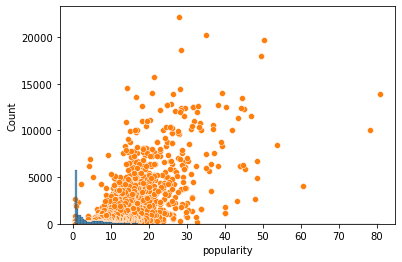

In [18]:
sns.histplot(merged_data['popularity'])
sns.scatterplot(x='popularity', y='vote_count', data=merged_data)



<AxesSubplot:xlabel='release_year', ylabel='count'>

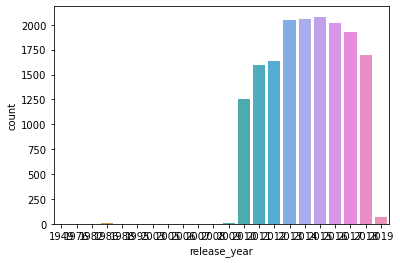

In [20]:
merged_data['release_date'] = pd.to_datetime(merged_data['release_date'])
merged_data['release_year'] = merged_data['release_date'].dt.year
sns.lineplot(x='release_year', y='averagerating', data=merged_data)
sns.countplot(x='release_year', data=merged_data)


In [22]:
df2 = pd.read_csv("cleaned_gross_budget.csv")

In [23]:
df2.head()

,movie,studio,foreign_gross,release_date,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,652000000.0,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09
1,Inception,WB,535700000.0,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08
2,Shrek Forever After,P/DW,513900000.0,"May 21, 2010",165000000.0,238736787.0,7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,398000000.0,"Jun 30, 2010",68000000.0,300531751.0,7.061028e+08
4,Iron Man 2,Par.,311500000.0,"May 7, 2010",170000000.0,312433331.0,6.211564e+08


In [24]:
df2.columns

Index(['movie', 'studio', 'foreign_gross', 'release_date', 'production_budget',
       'domestic_gross', 'worldwide_gross'],
      dtype='object')

DATA ANALYSIS

OBJECTIVE 2:  Identify which type of film is profitable

1. **How does the production budget relate to the domestic and worldwide gross revenue?**

Explore the correlation between production budget and earnings to identify films that generate higher returns on investment.

2. **What is the profitability of films over different release periods?**

Analyze how the release date affects movie profits, including seasonality trends (e.g., summer blockbusters).

3. **Which movie studios consistently produce profitable films?**

Compare the gross earnings of films released by different studios to identify trends in profitability based on the studio.

Scatter Plot:

How does the productions budget ralate to the domestic and worldwide gross revenue

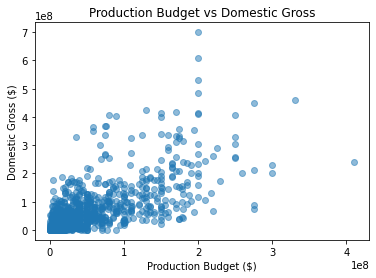

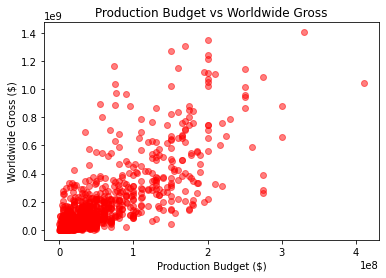

In [26]:
#How does the productions budget ralate to the domestic and worldwide gross revenue

import matplotlib.pyplot as plt

# Scatter plot for Production Budget vs Domestic Gross
plt.scatter(df2['production_budget'], df2['domestic_gross'], alpha=0.5)
plt.title('Production Budget vs Domestic Gross')
plt.xlabel('Production Budget ($)')
plt.ylabel('Domestic Gross ($)')
plt.show()

# Scatter plot for Production Budget vs Worldwide Gross
plt.scatter(df2['production_budget'], df2['worldwide_gross'], alpha=0.5, color='r')
plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.show()


Correlation Analysis

In [28]:
correlation_domestic = df2['production_budget'].corr(df2['domestic_gross'])
correlation_worldwide = df2['production_budget'].corr(df2['worldwide_gross'])

print(f"Correlation between Production Budget and Domestic Gross: {correlation_domestic}")
print(f"Correlation between Production Budget and Worldwide Gross: {correlation_worldwide}")


Correlation between Production Budget and Domestic Gross: 0.6744277885879324
Correlation between Production Budget and Worldwide Gross: 0.7669256443309962


Profitability Metric (Return on Investment)

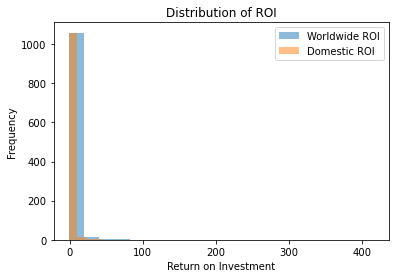

In [30]:
df2['roi_worldwide'] = (df2['worldwide_gross'] - df2['production_budget']) / df2['production_budget']
df2['roi_domestic'] = (df2['domestic_gross'] - df2['production_budget']) / df2['production_budget']

# Plot ROI
plt.hist(df2['roi_worldwide'], bins=20, alpha=0.5, label='Worldwide ROI')
plt.hist(df2['roi_domestic'], bins=20, alpha=0.5, label='Domestic ROI')
plt.title('Distribution of ROI')
plt.xlabel('Return on Investment')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**What is the profitability of films over different release periods?**

Profitability by genre and Studio

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Profitability column (Worldwide Gross - Production Budget)
df2['profitability'] = df2['worldwide_gross'] - df2['production_budget']

# 1. Profitability by Genre
plt.figure(figsize=(10,6))
sns.boxplot(data=df2, x='genre', y='profitability')
plt.title('Profitability by Genre')
plt.xticks(rotation=90)
plt.show()

# 2. Profitability by Studio (Assuming 'studio' column exists)
plt.figure(figsize=(12,6))
sns.boxplot(data=df2, x='studio', y='profitability')
plt.title('Profitability by Studio')
plt.xticks(rotation=90)
plt.show()

# 3. ROI by Genre (Profit / Production Budget)
df2['ROI'] = df2['profitability'] / df2['production_budget']
plt.figure(figsize=(10,6))
sns.boxplot(data=df2, x='genre', y='ROI')
plt.title('ROI by Genre')
plt.xticks(rotation=90)
plt.show()


ValueError: Could not interpret input 'genre'

<Figure size 720x432 with 0 Axes>

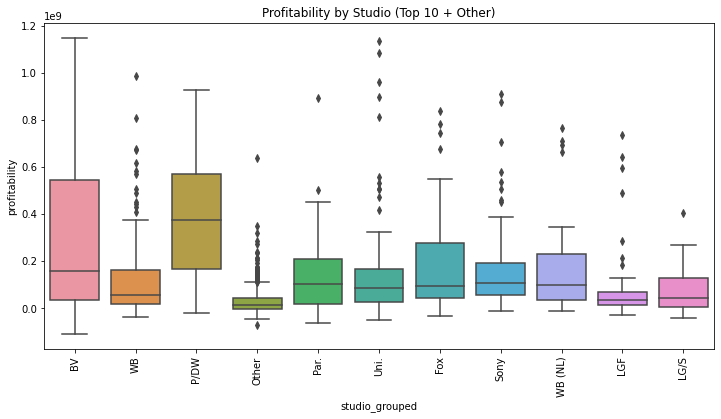

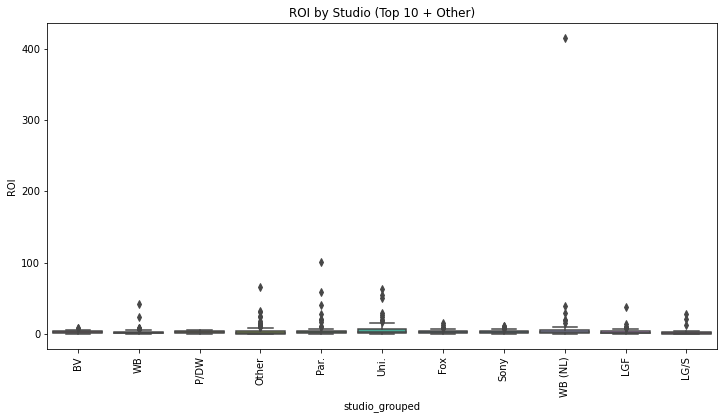

In [34]:
# Top 10 studios by profitability
top_studios = df2.groupby('studio')['profitability'].sum().nlargest(10).index
df2['studio_grouped'] = df2['studio'].apply(lambda x: x if x in top_studios else 'Other')

# 1. Profitability by grouped Studio
plt.figure(figsize=(12,6))
sns.boxplot(data=df2, x='studio_grouped', y='profitability')
plt.title('Profitability by Studio (Top 10 + Other)')
plt.xticks(rotation=90)
plt.show()

# 2. ROI by grouped Studio
df2['ROI'] = df2['profitability'] / df2['production_budget']
plt.figure(figsize=(12,6))
sns.boxplot(data=df2, x='studio_grouped', y='ROI')
plt.title('ROI by Studio (Top 10 + Other)')
plt.xticks(rotation=90)
plt.show()



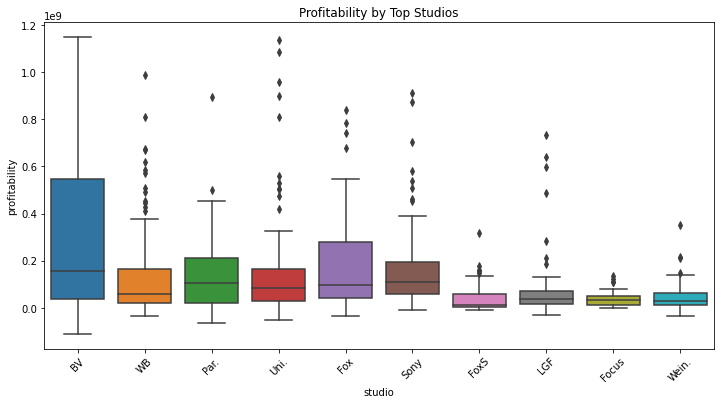

In [35]:
# 1. Count the number of films per studio
top_studios = df2['studio'].value_counts().head(10).index

# 2. Filter the dataframe to include only top studios
df2_top_studios = df2[df2['studio'].isin(top_studios)]

# 3. Profitability visualization for top studios
plt.figure(figsize=(12,6))
sns.boxplot(data=df2_top_studios, x='studio', y='profitability')
plt.title('Profitability by Top Studios')
plt.xticks(rotation=45)
plt.show()
